Data Modeling and Analysis

1. Import Libraries and Cleaned Data

In [34]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
train = pd.read_csv('datasets/clean_train')
test = pd.read_csv('datasets/clean_test')

In [36]:
train.head()

,Name,OPS,WAR
0,Chris Taylor\tayloch03,0.782,2.6
1,Roberto Perez\perezro02,0.564,-0.1
2,Brendan Rodgers\rodgebr02,0.798,1.4
3,Kelvin Gutierrez\gutieke01,0.608,-0.1
4,Taylor Ward\wardta01,0.769,0.6


In [37]:
train.shape

(180, 3)

In [38]:
test.head()

,Name,OPS,WAR
0,Josh Donaldson\donaljo02,0.827,3.2
1,Michael Chavis\chavimi01,0.655,-0.3
2,Anthony Alford\alforan01,0.717,0.4
3,Santiago Espinal\espinsa01,0.781,2.5
4,Manny Machado\machama01,0.836,5.0


In [39]:
test.shape

(78, 3)

2. Set Train and Test variables

In [40]:
#I have to get drop the Name column since it is not a numeric value. Player names won't be needed for my analysis so choosing to drop them instead of ignore them in my model is simpler.
train_ops = train.drop(['Name'], axis='columns')
test_ops = test.drop(['Name'], axis='columns')

In [41]:
X_train = train_ops.drop('WAR', axis='columns')
y_train = train_ops['WAR']

In [42]:
X_test= test_ops.drop('WAR', axis='columns')
y_test= test_ops['WAR']

3. Setup and Train Regression Model

In [43]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = lin.predict(X_test)

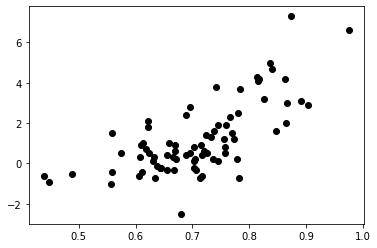

In [59]:
plt.scatter(X_test, y_test, color="black")

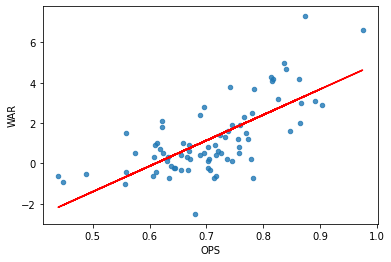

In [73]:
ax = test_ops.plot.scatter(x='OPS', y='WAR', alpha=.8)
ax.plot(test_ops['OPS'], lin.predict(test_ops[['OPS']]), c='r')

In [45]:
print("Coefficients: \n", lin.coef_)

Coefficients: 
 [12.68686626]


In [46]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 1.63


In [47]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.49
